# Laboratorio 3

In [3]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained GoogLeNet model
model = models.googlenet(pretrained=True)

# Modify the final fully connected layer for 100 classes
num_classes = 21
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to the chosen device
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Data transformations (customize as needed)
transform = transforms.Compose([
transforms.Resize((224, 224)),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
# Load your dataset

# Assuming dataset is in a directory with subfolders for each class
train_dataset = datasets.ImageFolder(root="C:\\Users\\tiari\\OneDrive\\Documents\\IA\\images_train_test_val\\train", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
 
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")
    torch.save(model.state_dict(), f"C:\\Users\\tiari\\OneDrive\\Documents\\IA\\model_epoch_{epoch}.pth")
print("Training complete.")

cuda
Epoch [1/10], Loss: 0.6338
Epoch [2/10], Loss: 0.2943
Epoch [3/10], Loss: 0.2114
Epoch [4/10], Loss: 0.1731
Epoch [5/10], Loss: 0.1447
Epoch [6/10], Loss: 0.1069
Epoch [7/10], Loss: 0.1048
Epoch [8/10], Loss: 0.1352
Epoch [9/10], Loss: 0.0948
Epoch [10/10], Loss: 0.0598
Training complete.


# Validación

Dispositivo: cuda


C:\Users\tiari\AppData\Local\Temp\ipykernel_11508\2332816758.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Precisión en el conjunto de validación: 96.57%


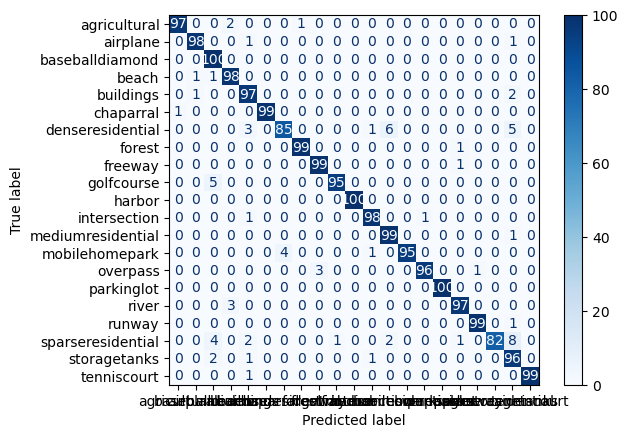

In [3]:

import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Configurar el dispositivo (usar GPU si está disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Dispositivo:", "cuda" if torch.cuda.is_available() else "cpu")

# Cargar el modelo GoogLeNet preentrenado
model = models.googlenet(pretrained=True)

# Modificar la capa totalmente conectada final para 21 clases
num_classes = 21
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Mover el modelo al dispositivo seleccionado
model = model.to(device)

# Cargar el estado del modelo desde un archivo .pth
model_path = "C:\\Users\\tiari\\OneDrive\\Documents\\IA\\model_epoch_9.pth"
model.load_state_dict(torch.load(model_path))
model.eval()  # Poner el modelo en modo de evaluación

# Definir las transformaciones de los datos (ajustar según sea necesario)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Cargar el conjunto de validación
val_dataset = datasets.ImageFolder(root="C:\\Users\\tiari\\OneDrive\\Documents\\IA\\images_train_test_val\\validation", transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Función para evaluar el modelo
def evaluate_model(model, val_loader):
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    accuracy = correct / total
    print(f'Precisión en el conjunto de validación: {accuracy * 100:.2f}%')

    # Matriz de confusión
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_dataset.classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Evaluar el modelo
evaluate_model(model, val_loader)
